In [1]:
Path = "/Users/jonasserry/Google Drive/GDFT-Net"

import sys
sys.path.append(Path+"/Core")

from Core import GDFT_Data
import numpy as np
import matplotlib.pyplot as plt
import Heuristic
import GDFT_Sim

Data Version: 1.40


In [29]:
#Params initialisation
params = None
params = {
"numChan": 32,
"dimensions": (256,64),
#"numSteps" : 25000,
"numSkip" : 0,
"numCoherent" : 10,
"numIncoherent" : 25,
"wavenumberRange" : (1.5,2.0),
"t0" : 10
}

Incoh_to_dec_factor = 2


params["numSteps"] = int(params["dimensions"][0]*params["numCoherent"]*params["numIncoherent"]/Incoh_to_dec_factor)
print(params["numSteps"])

dec_factor = int(params["numSteps"]/params["dimensions"][0])
print(dec_factor)

32000
125


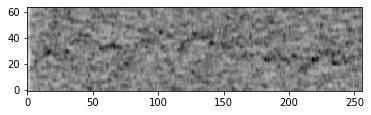

In [30]:
raw_image,label_2d,label_1d = GDFT_Data.Create_Image(SNR=1.0,**params)

plt.figure()
plt.imshow(raw_image[:,:,0], cmap=plt.get_cmap('gray_r'),origin="lower",aspect=1)


NEW: 12.7138563309261
OLD: 13.624338950357282


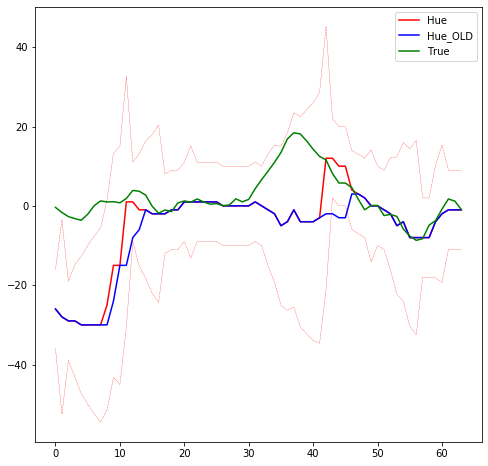

In [15]:
delays,temp = Heuristic.Heuristic_V2(raw_image,sigma0=10, SN_threshold = 1.4,scaling=np.sqrt)
old_delays=Heuristic.Heuristic(raw_image,sigma0=15,mem=5,no_mem=True)

plt.figure(figsize=(8,8))
plt.plot(delays,label="Hue",c="r")
plt.plot(old_delays,label="Hue_OLD",c="b")
plt.plot(label_1d,label="True",c="green")
plt.legend()

#plt.figure()
plt.plot(delays-temp,c="r",lw=0.3,ls="--")
plt.plot(delays+temp,c="r",lw=0.3,ls="--")
print("NEW: " + str(np.sqrt(np.mean((delays-label_1d)**2))))
print("OLD: " + str(np.sqrt(np.mean((old_delays-label_1d)**2))))

# Optimisation

In [32]:
params = None
params = {
"numChan": 32,
"dimensions": (256,64),
#"numSteps" : 25000,
"numSkip" : 0,
"numCoherent" : 10,
"numIncoherent" : 25,
"wavenumberRange" : (1.5,2.0),
"t0" : 10
}

Incoh_to_dec_factor = 2


params["numSteps"] = int(params["dimensions"][0]*params["numCoherent"]*params["numIncoherent"]/Incoh_to_dec_factor)
print(params["numSteps"])

dec_factor = int(params["numSteps"]/params["dimensions"][0])
print(dec_factor)

32000
125


In [33]:
Nums = np.full(20,50)
SNRs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
print(Nums)
print(np.sum(Nums))

[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50]
1000


In [34]:
id = "Heuristic_Test_Set"

DS = GDFT_Data.create_Data_Set(id,Nums,SNRs,**params)

Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:01:12
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:01:08
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:01:13
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:58
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:54
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:48
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:50
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:43
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:00:45
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:35
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:00:43
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:00:33
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:24
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:21
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:17
Finished B

In [35]:
images, labels_2D, labels_1D = DS.get_Data()

Starting

Finished | Time taken: 00:01:10


<ErrorbarContainer object of 3 artists>

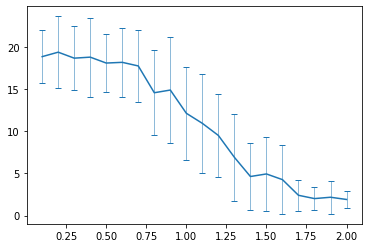

In [37]:
prediction = Heuristic.Hueristic_Images(images,sigma0=15)
i=0
means=[]
stds = []
for n in Nums:
    RMSE = np.sqrt(np.mean(((prediction[i:i+n]-labels_1D[i:i+n])**2),axis=1))
    means.append(np.mean(RMSE))
    stds.append(np.std(RMSE))
    i+=n
plt.errorbar(SNRs,means,yerr=stds,capsize=3,elinewidth=0.5) 

In [21]:
threshes = [1.0,1.1,1.2,1.3,1.4,1.5,1.75,2.0]
Means = []
STDS= []

for thresh in threshes:
    print("----------------------------------------------------")
    print(thresh)
    prediction = Heuristic.Hueristic_Images_V2(images,sigma0=10, SN_threshold = thresh)
    i=0
    means=[]
    stds = []
    for n in Nums:
        RMSE = np.sqrt(np.mean(((prediction[i:i+n]-labels_1D[i:i+n])**2),axis=1))
        means.append(np.mean(RMSE))
        stds.append(np.std(RMSE))
        i+=n
    print("TOTAL MEAN: " + str(np.mean(means)))
    print("LOW SNR: " + str(np.mean(means[0:10])))
    print("High SNR: " + str(np.mean(means[10:20])))
    Means.append(means)
    STDS.append(stds)



----------------------------------------------------
1.0


Starting

Finished | Time taken: 00:02:55
TOTAL MEAN: 10.268028683455729
LOW SNR: 15.365743583436785
High SNR: 5.170313783474679
----------------------------------------------------
1.1


Starting

Finished | Time taken: 00:02:57
TOTAL MEAN: 9.70341334679355
LOW SNR: 14.924184309146224
High SNR: 4.482642384440874
----------------------------------------------------
1.2


Starting

Finished | Time taken: 00:02:57
TOTAL MEAN: 9.217999866128029
LOW SNR: 14.670700299383876
High SNR: 3.7652994328721774
----------------------------------------------------
1.3


Starting

Finished | Time taken: 00:02:59
TOTAL MEAN: 9.19505113755131
LOW SNR: 14.936113178727343
High SNR: 3.4539890963752766
----------------------------------------------------
1.4


Starting

Finished | Time taken: 00:02:58
TOTAL MEAN: 9.565658943724639
LOW SNR: 15.72367289779343
High SNR: 3.40764498965585
----------------------------------------------------
1.5


Starting

Finished | Time taken: 00:03:17
TOTAL MEAN: 9.950670060971394
LOW SNR: 16.448751275971908
High SNR: 3.4525888459708853
----------------------------------------------------
1.75


Starting

Finished | Time taken: 00:03:10
TOTAL MEAN: 10.633855654622792
LOW SNR: 17.332897639753458
High SNR: 3.934813669492125
----------------------------------------------------
2.0


Starting

Finished | Time taken: 00:03:06
TOTAL MEAN: 10.945363162148535
LOW SNR: 17.488881951448583
High SNR: 4.401844372848484


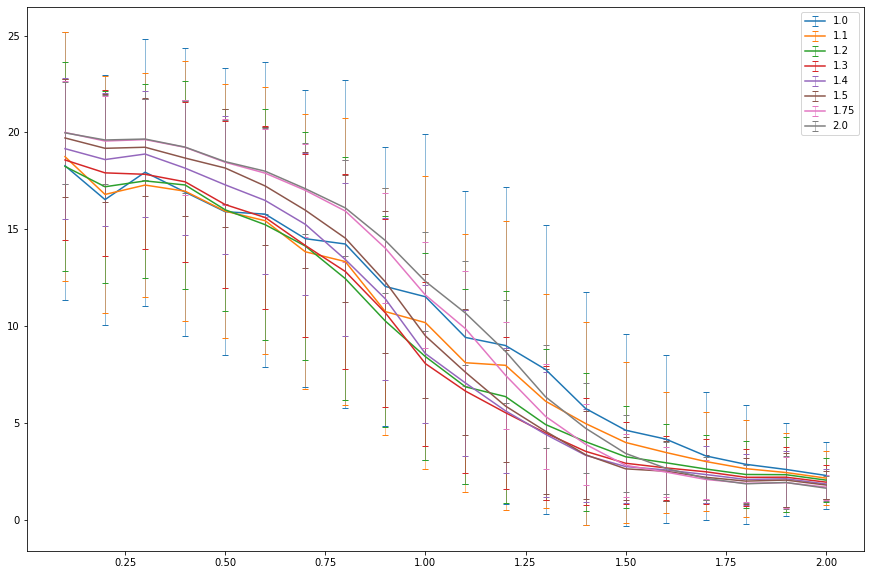

In [22]:
plt.figure(figsize=(15,10))
i = 0
for i in range(len(threshes)):
    plt.errorbar(SNRs,Means[i],yerr=STDS[i],capsize=3,elinewidth=0.5,label=threshes[i]) 
    i+=1
plt.legend()

In [23]:
sigma0s = [8,9,10,11,12,13,14,15]
Means = []
STDS= []

for sig in sigma0s:
    print("----------------------------------------------------")
    print(sig)
    prediction = Heuristic.Hueristic_Images_V2(images,sigma0=sig, SN_threshold = 1.3)
    i=0
    means=[]
    stds = []
    for n in Nums:
        RMSE = np.sqrt(np.mean(((prediction[i:i+n]-labels_1D[i:i+n])**2),axis=1))
        means.append(np.mean(RMSE))
        stds.append(np.std(RMSE))
        i+=n
    print("TOTAL MEAN: " + str(np.mean(means)))
    print("LOW SNR: " + str(np.mean(means[0:10])))
    print("High SNR: " + str(np.mean(means[10:20])))
    Means.append(means)
    STDS.append(stds)


----------------------------------------------------
8


Starting

Finished | Time taken: 00:04:04
TOTAL MEAN: 9.24780441283471
LOW SNR: 14.789334498400555
High SNR: 3.7062743272688676
----------------------------------------------------
9


Starting

Finished | Time taken: 00:04:38
TOTAL MEAN: 9.20269721784855
LOW SNR: 14.862061583764653
High SNR: 3.543332851932449
----------------------------------------------------
10


Starting

Finished | Time taken: 00:04:30
TOTAL MEAN: 9.19505113755131
LOW SNR: 14.936113178727343
High SNR: 3.4539890963752766
----------------------------------------------------
11


Starting

Finished | Time taken: 00:04:01
TOTAL MEAN: 9.19361241251385
LOW SNR: 15.014959340878395
High SNR: 3.372265484149311
----------------------------------------------------
12


Starting

Finished | Time taken: 00:03:55
TOTAL MEAN: 9.212889020624061
LOW SNR: 15.086293830426786
High SNR: 3.3394842108213405
----------------------------------------------------
13


Starting

Finished | Time taken: 00:06:18
TOTAL MEAN: 9.232086742879194
LOW SNR: 15.140355319620554
High SNR: 3.3238181661378334
----------------------------------------------------
14


Starting

Finished | Time taken: 00:07:01
TOTAL MEAN: 9.263701734999353
LOW SNR: 15.233814346303472
High SNR: 3.2935891236952295
----------------------------------------------------
15


100.0% done

(0, 1.5)

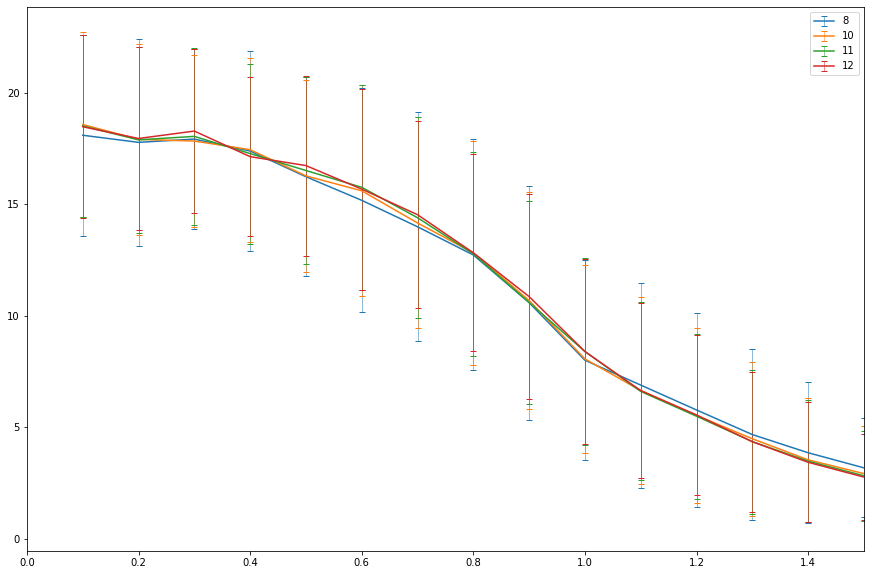

In [26]:
plt.figure(figsize=(15,10))
i = 0
for i in [0,2,3,4]:
    plt.errorbar(SNRs,Means[i],yerr=STDS[i],capsize=3,elinewidth=0.5,label=sigma0s[i]) 
    i+=1
plt.legend()
plt.xlim(0,1.5)

In [28]:
sigma0s = [5,6,7,8,9,10,12,15]
Means = []
STDS= []

for sig in sigma0s:
    print("----------------------------------------------------")
    print(sig)
    prediction = Heuristic.Hueristic_Images(images,sigma0=sig)
    i=0
    means=[]
    stds = []
    for n in Nums:
        RMSE = np.sqrt(np.mean(((prediction[i:i+n]-labels_1D[i:i+n])**2),axis=1))
        means.append(np.mean(RMSE))
        stds.append(np.std(RMSE))
        i+=n
    print("TOTAL MEAN: " + str(np.mean(means)))
    print("LOW SNR: " + str(np.mean(means[0:10])))
    print("High SNR: " + str(np.mean(means[10:20])))
    Means.append(means)
    STDS.append(stds)


----------------------------------------------------
5


Starting

Finished | Time taken: 00:06:42
TOTAL MEAN: 13.28282842813401
LOW SNR: 16.25827200488572
High SNR: 10.307384851382297
----------------------------------------------------
6


Starting

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,10))
i = 0
for i in range(len(sigma0s)):
    plt.errorbar(SNRs,Means[i],yerr=STDS[i],capsize=3,elinewidth=0.5,label=sigma0s[i]) 
    i+=1
plt.legend()

# Heuristic Tests


In [3]:
params = None
params = {
"numChan": 32,
"numSkip" : 0,
"numCoherent" : 10,
"numIncoherent" : 25,
"wavenumberRange" : (1.5,2.0),
"t0" : 10
}

Incoh_to_dec_factor = 2


In [11]:
Nums = np.full(20,50)
SNRs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
print(Nums)
print(np.sum(Nums))

[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50]
1000


In [12]:
dims = [64,128,256,512]
Means = []
STDS = []

for d in dims:
    id = "Heuristic_Test_Set"
    numSteps=int(d*params["numCoherent"]*params["numIncoherent"]/Incoh_to_dec_factor)
    DS = GDFT_Data.create_Data_Set(id,Nums,SNRs,numSteps=numSteps,dimensions=(d,64),**params)
    images, labels_2D, labels_1D = DS.get_Data()
    prediction = Heuristic.Hueristic_Images_V2(images,sigma0=10, SN_threshold = 1.3)
    i=0
    means=[]
    stds = []
    for n in Nums:
        RMSE = np.sqrt(np.mean(((prediction[i:i+n]-labels_1D[i:i+n])**2),axis=1))
        means.append(np.mean(RMSE))
        stds.append(np.std(RMSE))
        i+=n
    Means.append(means)
    STDS.append(stds)

Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:20
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:25
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:18
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:17
Finished Batch | Time taken: 00:00:00 | Total Time Left: 00:00:14
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:18
Finished Batch | Time taken: 00:00:00 | Total Time Left: 00:00:11
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:12
Finished Batch | Time taken: 00:00:00 | Total Time Left: 00:00:10
Finished Batch | Time taken: 00:00:00 | Total Time Left: 00:00:09
Finished Batch | Time taken: 00:00:00 | Total Time Left: 00:00:08
Finished Batch | Time taken: 00:00:00 | Total Time Left: 00:00:07
Finished Batch | Time taken: 00:00:00 | Total Time Left: 00:00:06
Finished Batch | Time taken: 00:00:00 | Total Time Left: 00:00:05
Finished Batch | Time taken: 00:00:00 | Total Time Left: 00:00:04
Finished B

Starting

Finished | Time taken: 00:00:55
Finished Batch | Time taken: 00:00:02 | Total Time Left: 00:00:42
Finished Batch | Time taken: 00:00:02 | Total Time Left: 00:00:36
Finished Batch | Time taken: 00:00:02 | Total Time Left: 00:00:36
Finished Batch | Time taken: 00:00:02 | Total Time Left: 00:00:36
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:29
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:25
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:24
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:23
Finished Batch | Time taken: 00:00:02 | Total Time Left: 00:00:24
Finished Batch | Time taken: 00:00:01 | Total Time Left: 00:00:19
Finished Batch | Time taken: 00:00:02 | Total Time Left: 00:00:18
Finished Batch | Time taken: 00:00:02 | Total Time Left: 00:00:17
Finished Batch | Time taken: 00:00:02 | Total Time Left: 00:00:14
Finished Batch | Time taken: 00:00:02 | Total Time Left: 00:00:13
Finished Batch | Time taken: 00:00:02 | Tota

Starting

Finished | Time taken: 00:01:12
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:01:20
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:01:09
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:01:04
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:01:04
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:58
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:00:56
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:48
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:00:49
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:43
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:39
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:00:38
Finished Batch | Time taken: 00:00:04 | Total Time Left: 00:00:32
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:26
Finished Batch | Time taken: 00:00:03 | Total Time Left: 00:00:23
Finished Batch | Time taken: 00:00:03 | Tota

Starting

Finished | Time taken: 00:01:47
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:02:35
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:02:37
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:02:25
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:02:11
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:02:05
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:01:58
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:01:48
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:01:38
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:01:31
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:01:24
Finished Batch | Time taken: 00:00:07 | Total Time Left: 00:01:11
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:01:04
Finished Batch | Time taken: 00:00:08 | Total Time Left: 00:01:00
Finished Batch | Time taken: 00:00:09 | Total Time Left: 00:00:54
Finished Batch | Time taken: 00:00:08 | Tota

Starting

Finished | Time taken: 00:03:04


Text(0, 0.5, 'RMSE ($\\lambda_0$)')

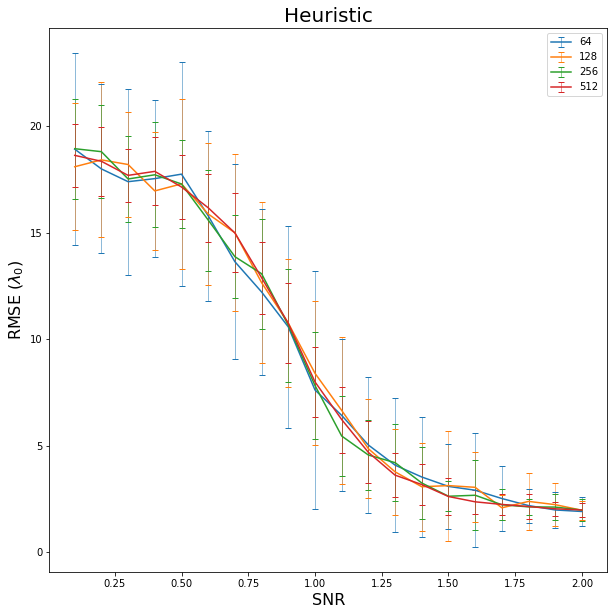

In [17]:
i=0
plt.figure(figsize=(10,10))
while i<len(dims):
    plt.errorbar(SNRs,Means[i],yerr=STDS[i],capsize=3,elinewidth=0.5,label=dims[i]) 
    i+=1

plt.legend()
plt.xlabel("SNR",fontsize=16)
plt.title("Heuristic",fontsize=20)
plt.ylabel(r"RMSE ($\lambda_0$)",fontsize=16)
